# AI-Enabled Spectrum Coexistence between Active Communications and Passive Radio Services: Fundamentals, Testbed and Data

![](impress.png)

# Overall Setup

![](overall_testbed.png)

# Data Pipeline

![](data_storage.png)

# Schematic of Radiometer and 5G Transmission 

![](Overall_testbed_scehmatic.png)

In [1]:
from file_reader import FileReader
# from spectrogram_gen import SpectrogramGenerator
# from psd_gen import PowerSpectralDensity
from data_process import DataProcessor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from butterworth_lowpass import ButterworthLowpassFilter
import copy   
import h5py
import os
from convert_TB import TB_Calculator
import os
import glob
import re

In [2]:
# Sorting files from sample 1
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [3]:
#Plotting Spectrograms
def plot_spect(dataset, title,min_value,max_value,normalized=False):
    if normalized:
        global_maximum = np.amax(np.abs(dataset))
    else:
        global_maximum = 1
        
    y_res = 20 * np.log10(np.abs(dataset) / global_maximum)
    
    plt.figure(figsize=(12, 8))
    im = plt.imshow(y_res, origin='lower', cmap='jet', aspect='auto', vmax=max_value, vmin=min_value)
    plt.colorbar(label='dB')
    
    yaxis = np.ceil(np.linspace(-15, 15, 11))
    ylabel = np.linspace(0, len(y_res), 11)
    xaxis = np.linspace(0, .25, 5)
    xlabel = np.linspace(0, len(y_res[1]), 5)
    
    plt.title(title)
    plt.yticks(ylabel, yaxis)
    plt.xticks(xlabel, xaxis)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.tight_layout()

# L0 Data 

In [4]:
# Set the working directory to L0 files
dirct_L0 ="Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1/fc0/2RB/Gain10/QPSK/L0"
os.chdir("Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1/fc0/2RB/Gain10/QPSK/L0")
print(os.listdir())

['inband_2RB_Gain10_QPSK_fc0_rfi_L0_SN1.h5', 'inband_2RB_Gain10_QPSK_fc0_rfi_L0_SN10.h5', 'inband_2RB_Gain10_QPSK_fc0_rfi_L0_SN2.h5', 'inband_2RB_Gain10_QPSK_fc0_rfi_L0_SN3.h5', 'inband_2RB_Gain10_QPSK_fc0_rfi_L0_SN4.h5', 'inband_2RB_Gain10_QPSK_fc0_rfi_L0_SN5.h5', 'inband_2RB_Gain10_QPSK_fc0_rfi_L0_SN6.h5', 'inband_2RB_Gain10_QPSK_fc0_rfi_L0_SN7.h5', 'inband_2RB_Gain10_QPSK_fc0_rfi_L0_SN8.h5', 'inband_2RB_Gain10_QPSK_fc0_rfi_L0_SN9.h5']


In [5]:
filename_L0=[]
numbers = re.compile(r'(\d+)')
for infile in sorted(glob.glob(os.path.join(dirct_L0,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L0.append( infile)


In [6]:
# read and process all the files together
for i in range(len(filename_L0)):
    f1 = h5py.File(filename_L0[i],'r') 
index_sample = 0
# Checking a particular sample
f1 = h5py.File(filename_L0[index_sample],'r')  

In [7]:
#Checking the keys in 
def print_hdf5_file_structure(item, offset=""):
    if isinstance(item, h5py.File) or isinstance(item, h5py.Group):
        print(offset + f"+ {item.name}")
        for key in item:
            print_hdf5_file_structure(item[key], offset + "    ")
    elif isinstance(item, h5py.Dataset):
        print(offset + f"- {item.name}")

print("Hierarchy of keys in the HDF5 file:")
print_hdf5_file_structure(f1)

Hierarchy of keys in the HDF5 file:
+ /
    + /H-pol
        - /H-pol/H-pol
    + /V-pol
        - /V-pol/V-pol
    + /ref1
        - /ref1/ref1
    + /ref2
        - /ref2/ref2


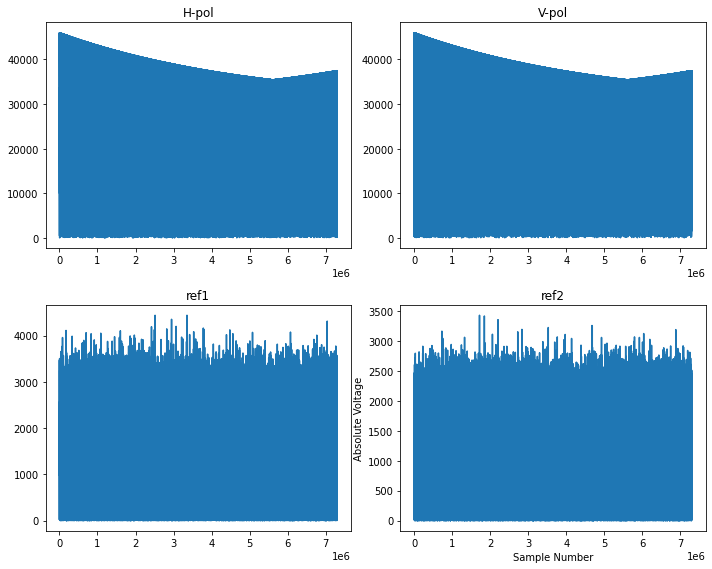

In [8]:
keys = list(f1.keys())
ig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))  # Create a 2x2 subplot grid
# Iterate through the groups and plot the data in the datasets
for i, group_name in enumerate(keys):
    group = f1[group_name]

    # Assuming there's only one dataset in each group, you can retrieve it
    dataset_name = list(group.keys())[0]
    dataset = group[dataset_name]

    # Get the data and plot it on the respective subplot
    data = dataset[()]  # Reading the entire dataset into memory
    row = i // 2
    col = i % 2
    axes[row, col].plot(np.abs(data))
    axes[row, col].set_title(f"{dataset_name}")

# Adjust layout and show the plot
plt.tight_layout()
plt.xlabel("Sample Number")
plt.ylabel("Absolute Voltage")                    
plt.show()          

# L1A Data

In [9]:
# Set the working directory to L0 files
dirct_L1A ="Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1/fc0/2RB/Gain10/QPSK/L1A"
os.chdir("Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1/fc0/2RB/Gain10/QPSK/L1A")
print(os.listdir())

['inband_2RB_Gain10_QPSK_fc0_rfi_L1A_SN1.h5', 'inband_2RB_Gain10_QPSK_fc0_rfi_L1A_SN10.h5', 'inband_2RB_Gain10_QPSK_fc0_rfi_L1A_SN2.h5', 'inband_2RB_Gain10_QPSK_fc0_rfi_L1A_SN3.h5', 'inband_2RB_Gain10_QPSK_fc0_rfi_L1A_SN4.h5', 'inband_2RB_Gain10_QPSK_fc0_rfi_L1A_SN5.h5', 'inband_2RB_Gain10_QPSK_fc0_rfi_L1A_SN6.h5', 'inband_2RB_Gain10_QPSK_fc0_rfi_L1A_SN7.h5', 'inband_2RB_Gain10_QPSK_fc0_rfi_L1A_SN8.h5', 'inband_2RB_Gain10_QPSK_fc0_rfi_L1A_SN9.h5']


In [10]:
filename_L1A=[]

for infile in sorted(glob.glob(os.path.join(dirct_L1A,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1A.append( infile)

In [11]:
# read and process all the files together
for i in range(len(filename_L1A)):
    f2 = h5py.File(filename_L1A[i],'r') 

index_sample = 0
# Checking a particular sample
f2 = h5py.File(filename_L1A[index_sample],'r')  

In [12]:
def print_hdf5_file_structure(item, offset=""):
    if isinstance(item, h5py.File) or isinstance(item, h5py.Group):
        print(offset + f"+ {item.name}")
        for key in item:
            print_hdf5_file_structure(item[key], offset + "    ")
    elif isinstance(item, h5py.Dataset):
        print(offset + f"- {item.name}")

print("Hierarchy of keys in the HDF5 file:")
print_hdf5_file_structure(f2)


Hierarchy of keys in the HDF5 file:
+ /
    + /L1A
        + /L1A/PSD
            + /L1A/PSD/H-pol
                - /L1A/PSD/H-pol/psd_h_filter
                - /L1A/PSD/H-pol/psd_h_irr
                - /L1A/PSD/H-pol/psd_h_unfilter
            + /L1A/PSD/V-pol
                - /L1A/PSD/V-pol/psd_v_filter
                - /L1A/PSD/V-pol/psd_v_irr
                - /L1A/PSD/V-pol/psd_v_unfilter
            + /L1A/PSD/ref1
                - /L1A/PSD/ref1/psd_ref1_filter
                - /L1A/PSD/ref1/psd_ref1_irr
                - /L1A/PSD/ref1/psd_ref1_unfilter
            + /L1A/PSD/ref2
                - /L1A/PSD/ref2/psd_ref2_filter
                - /L1A/PSD/ref2/psd_ref2_irr
                - /L1A/PSD/ref2/psd_ref2_unfilter
        + /L1A/STFT
            + /L1A/STFT/H-pol
                - /L1A/STFT/H-pol/stft_h_filter
                - /L1A/STFT/H-pol/stft_h_irr
                - /L1A/STFT/H-pol/stft_h_unfilter
            + /L1A/STFT/V-pol
                - /L1A/STFT/V-pol

### PSD of H-pol

In [13]:
#We will show the PSD of unfiltered, filtered and internal rfi removed (IRR) data
psd_h_unfilter_dataset = f2["/L1A/PSD/H-pol/psd_h_unfilter"] [()]
psd_h_filter_dataset = f2["/L1A/PSD/H-pol/psd_h_filter"] [()]    
psd_h_irr_dataset = f2["/L1A/PSD/H-pol/psd_h_irr"][()]

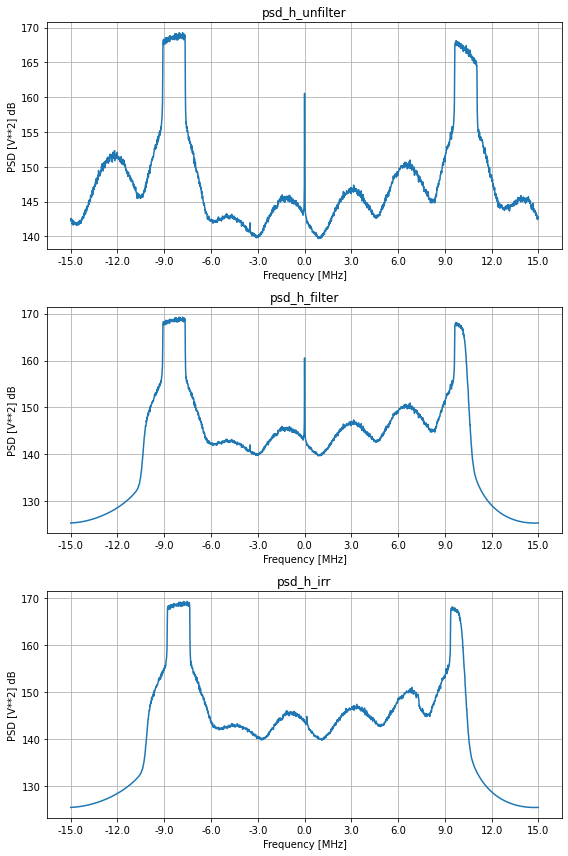

In [14]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))
xaxis = np.ceil(np.linspace(-15, 15, 11))

# Plot data in subplots
axes[1].plot(10 * np.log10(psd_h_filter_dataset))
axes[1].set_title("psd_h_filter")
axes[1].set_xlabel('Frequency [MHz]')  # Setting x-axis label for the 2nd subplot
axes[1].set_ylabel('PSD [V**2] dB')  # Setting y-axis label for the 2nd subplot
xlabel = np.linspace(0, len(psd_h_filter_dataset), 11)
axes[1].set_xticks(xlabel,xaxis)  # Setting x-axis ticks for the 2nd subplot
axes[1].grid()

axes[0].plot(10 * np.log10(psd_h_unfilter_dataset))
axes[0].set_title("psd_h_unfilter")
axes[0].set_xlabel('Frequency [MHz]')  # Setting x-axis label for the 1st subplot
axes[0].set_ylabel('PSD [V**2] dB')  # Setting y-axis label for the 1st subplot
xlabel = np.linspace(0, len(psd_h_unfilter_dataset), 11)
axes[0].set_xticks(xlabel,xaxis)  # Setting x-axis ticks for the 1st subplot
axes[0].grid()

axes[2].plot(10 * np.log10(psd_h_irr_dataset))
axes[2].set_title("psd_h_irr")
axes[2].set_xlabel('Frequency [MHz]')  # Setting x-axis label for the 3rd subplot
axes[2].set_ylabel('PSD [V**2] dB')  # Setting y-axis label for the 3rd subplot
xlabel = np.linspace(0, len(psd_h_irr_dataset), 11)
axes[2].set_xticks(xlabel,xaxis)  # Setting x-axis ticks for the 3rd subplot
axes[2].grid()

plt.tight_layout()
plt.show()


### Plot the spectrograms with the help of STFT

In [15]:
stft_h_unfilter_dataset = f2["/L1A/STFT/H-pol/stft_h_unfilter"][()]
stft_h_filter_dataset = f2["/L1A/STFT/H-pol/stft_h_filter"][()]    
stft_h_irr_dataset = f2["/L1A/STFT/H-pol/stft_h_irr"][()]


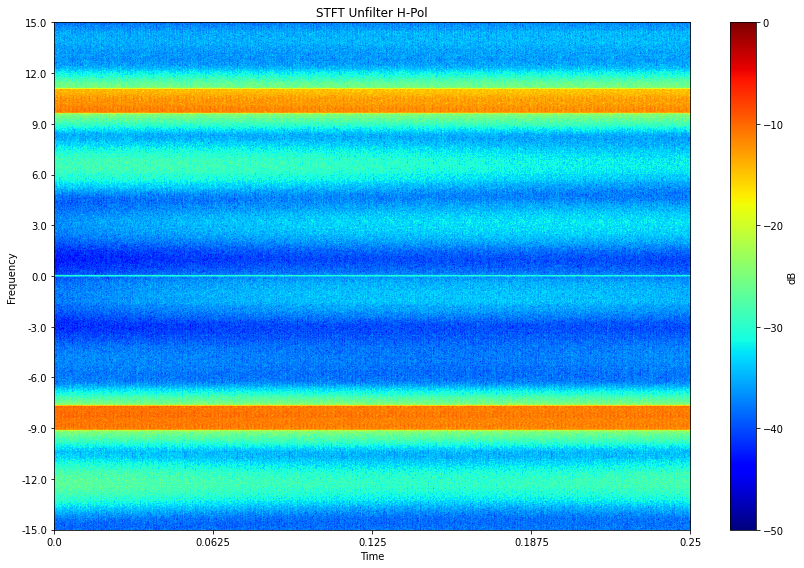

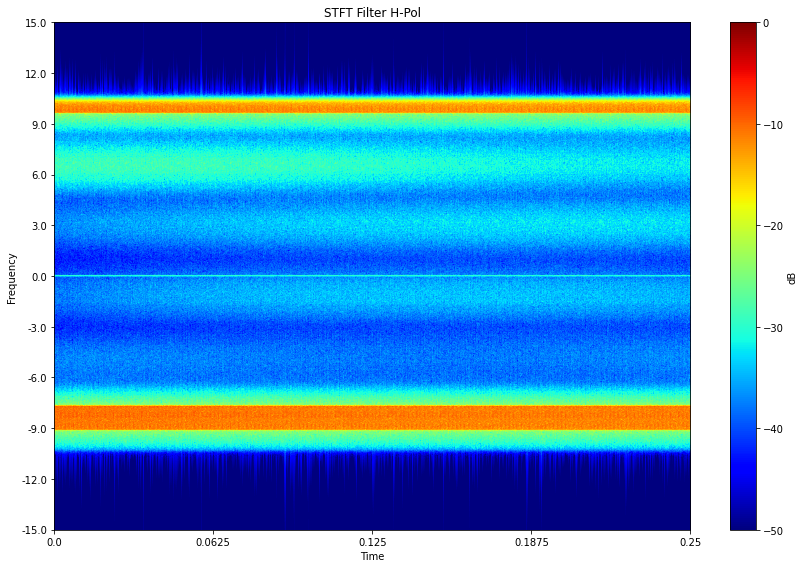

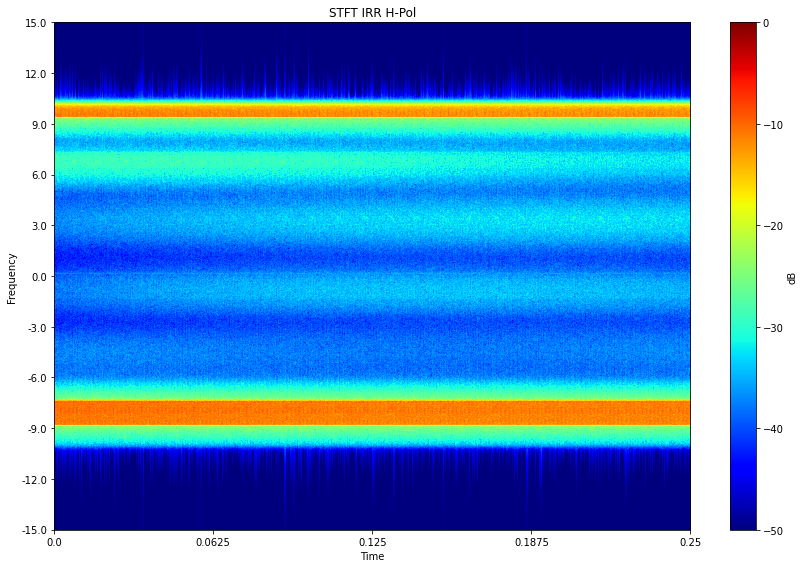

In [16]:
## Here are spectrograms are plotted in terms of antenna counts without calibration and normalized
plot_spect(stft_h_unfilter_dataset, "STFT Unfilter H-Pol",-50 ,0,normalized=True)
plot_spect(stft_h_filter_dataset, "STFT Filter H-Pol",-50 ,0,normalized=True)
plot_spect(stft_h_irr_dataset, "STFT IRR H-Pol",-50 ,0,normalized=True)

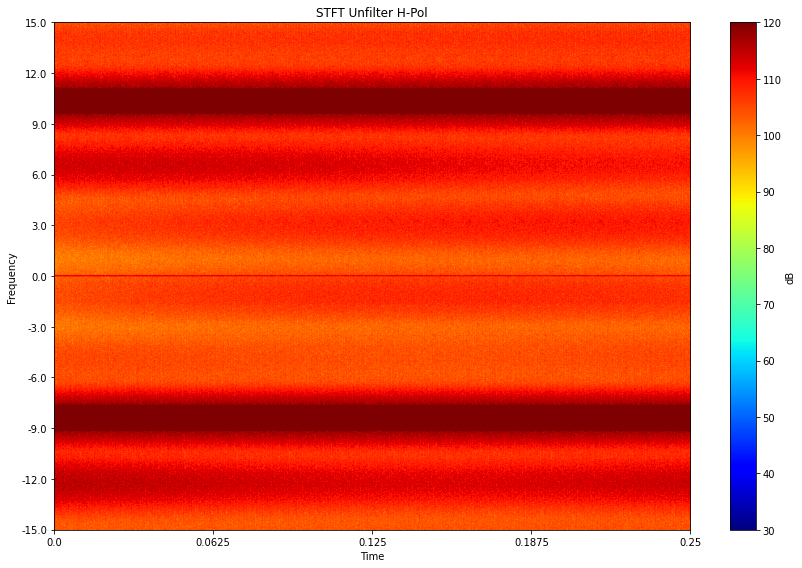

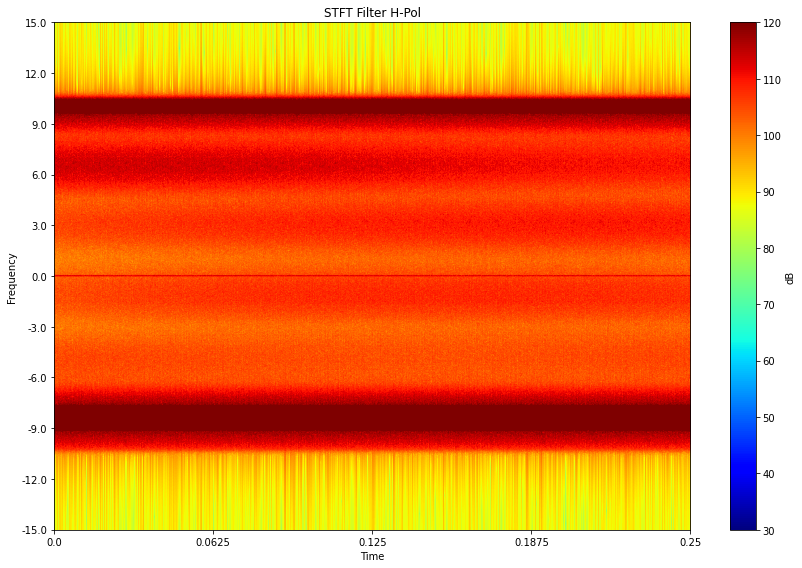

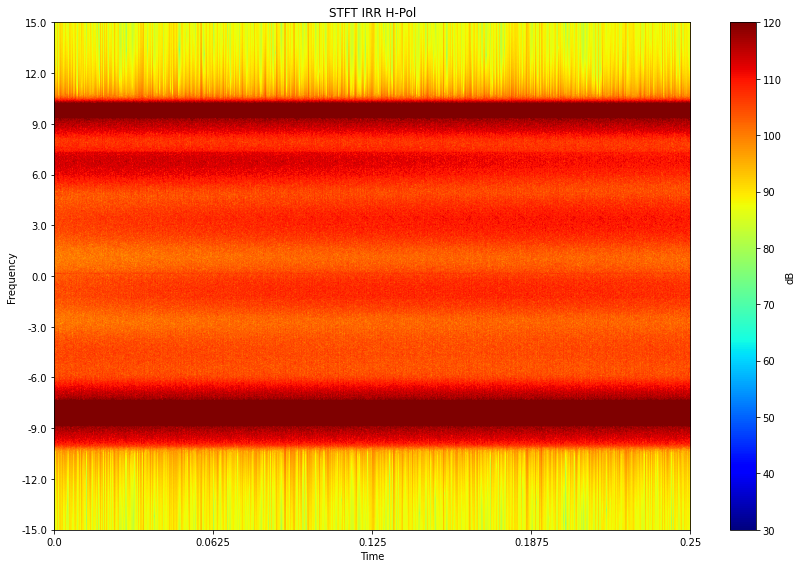

In [17]:
## Here are spectrograms are plotted in terms of antenna counts without calibration and normalized
plot_spect(stft_h_unfilter_dataset, "STFT Unfilter H-Pol",30 ,120,normalized=False)
plot_spect(stft_h_filter_dataset, "STFT Filter H-Pol",30 ,120,normalized=False)
plot_spect(stft_h_irr_dataset, "STFT IRR H-Pol",30 ,120,normalized=False)

# L1B Data 

In [18]:
# Set the working directory to L0 files
dirct_L1B ="Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1/fc0/2RB/Gain10/QPSK/L1B"
os.chdir("Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1/fc0/2RB/Gain10/QPSK/L1B")
print(os.listdir())

['inband_2RB_Gain10_QPSK_fc0_rfi_L1B_SN1.h5', 'inband_2RB_Gain10_QPSK_fc0_rfi_L1B_SN10.h5', 'inband_2RB_Gain10_QPSK_fc0_rfi_L1B_SN2.h5', 'inband_2RB_Gain10_QPSK_fc0_rfi_L1B_SN3.h5', 'inband_2RB_Gain10_QPSK_fc0_rfi_L1B_SN4.h5', 'inband_2RB_Gain10_QPSK_fc0_rfi_L1B_SN5.h5', 'inband_2RB_Gain10_QPSK_fc0_rfi_L1B_SN6.h5', 'inband_2RB_Gain10_QPSK_fc0_rfi_L1B_SN7.h5', 'inband_2RB_Gain10_QPSK_fc0_rfi_L1B_SN8.h5', 'inband_2RB_Gain10_QPSK_fc0_rfi_L1B_SN9.h5']


In [19]:
filename_L1B=[]

for infile in sorted(glob.glob(os.path.join(dirct_L1B,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B.append( infile)

In [20]:
# read and process all the files together
for i in range(len(filename_L1B)):
    f3 = h5py.File(filename_L1B[i],'r') 
index_sample = 0
# Checking a particular sample
f3 = h5py.File(filename_L1B[index_sample],'r') 

In [21]:
print("Hierarchy of keys in the HDF5 file:")
print_hdf5_file_structure(f3)

Hierarchy of keys in the HDF5 file:
+ /
    + /L1B
        + /L1B/TB
            + /L1B/TB/Avg
                - /L1B/TB/Avg/H-pol
                - /L1B/TB/Avg/V-pol
            + /L1B/TB/GT
                - /L1B/TB/GT/ground_truth_temp
            + /L1B/TB/Spectral
                - /L1B/TB/Spectral/H-pol
                - /L1B/TB/Spectral/V-pol
        + /L1B/TB_cal
            - /L1B/TB_cal/TB_Ref_1_HS
            - /L1B/TB_cal/TB_Ref_2_ACS
            - /L1B/TB_cal/Tphy_Ref_2_ACS


In [22]:
stft_h_spectral = f3["/L1B/TB/Spectral/H-pol"][()]

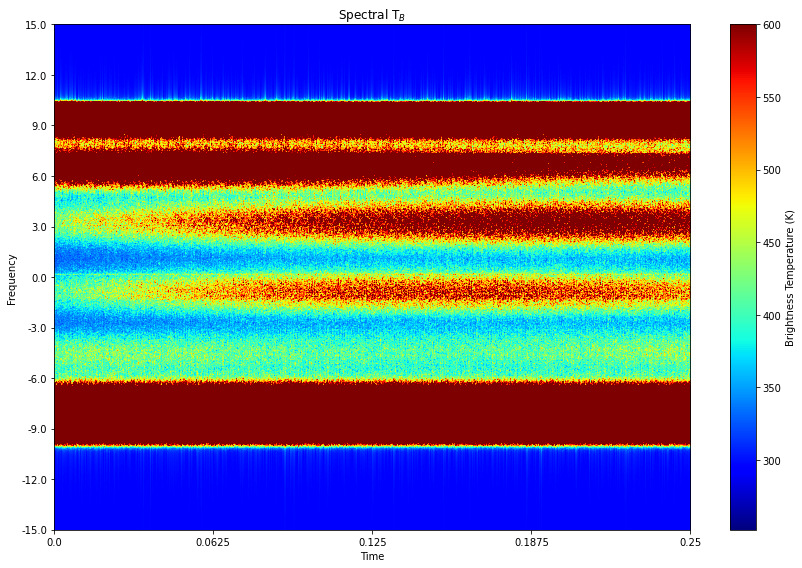

In [23]:
plt.figure(figsize=(12, 8))
im1 = plt.imshow(stft_h_spectral, origin='lower', cmap='jet',  aspect='auto',vmax=280,vmin=600)
plt.colorbar(label='Brightness Temperature (K)')
# plt.xticks(xlabel,axis)
# plt.yticks(ylabel,yaxis)
yaxis=np.ceil(np.linspace(-15,15,11))
ylabel=np.linspace(0,len(stft_h_spectral),11)
xaxis=(np.linspace(0,.25,5))
xlabel=np.linspace(0,len(stft_h_spectral[1]),5)
plt.title("Spectral T$_{B}$")
plt.yticks(ylabel,yaxis)
plt.xticks(xlabel,xaxis)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.tight_layout()

# Experiment Scenarios 

## a) Fully In-Band
## b) Transition-Band
## c) Out-Of-Band

![](Experiment_Scenarios.png)

## Comparing different gains ((a) Fully In-Band - 2RBG)

In [24]:
dirct_L1B_G_m10 ="Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1/fc0/2RB/Gain-10/QPSK/L1B"
dirct_L1B_G_m20 ="Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1/fc0/2RB/Gain-20/QPSK/L1B"
dirct_L1B_G_p10 ="Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1/fc0/2RB/Gain10/QPSK/L1B"
dirct_L1B_G_p20 ="Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1/fc0/2RB/Gain20/QPSK/L1B"
dirct_L1B_G_0 ="Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1/fc0/2RB/Gain0/QPSK/L1B"

In [25]:
filename_L1B_G_m10=[]
filename_L1B_G_m20=[]
filename_L1B_G_p10=[]
filename_L1B_G_p20=[]
filename_L1B_G_0=[]

for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_m10,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_m10.append( infile)
for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_m20,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_m20.append( infile)
for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_p10,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_p10.append( infile)
for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_p20,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_p20.append( infile)
for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_0,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_0.append( infile)


In [26]:
index_sample = 0
# Checking a particular sample
f3_G_m10 = h5py.File(filename_L1B_G_m10[index_sample],'r')
f3_G_m20 = h5py.File(filename_L1B_G_m20[index_sample],'r') 
f3_G_p10 = h5py.File(filename_L1B_G_p10[index_sample],'r')
f3_G_p20 = h5py.File(filename_L1B_G_p20[index_sample],'r') 
f3_G_0 = h5py.File(filename_L1B_G_0[index_sample],'r') 

In [27]:
stft_h_spectral_G_m10 = f3_G_m10["/L1B/TB/Spectral/H-pol"][()]
stft_h_spectral_G_m20 = f3_G_m20["/L1B/TB/Spectral/H-pol"][()]
stft_h_spectral_G_p10 = f3_G_p10["/L1B/TB/Spectral/H-pol"][()]
stft_h_spectral_G_p20 = f3_G_p20["/L1B/TB/Spectral/H-pol"][()]
stft_h_spectral_G_0 = f3_G_0["/L1B/TB/Spectral/H-pol"][()]

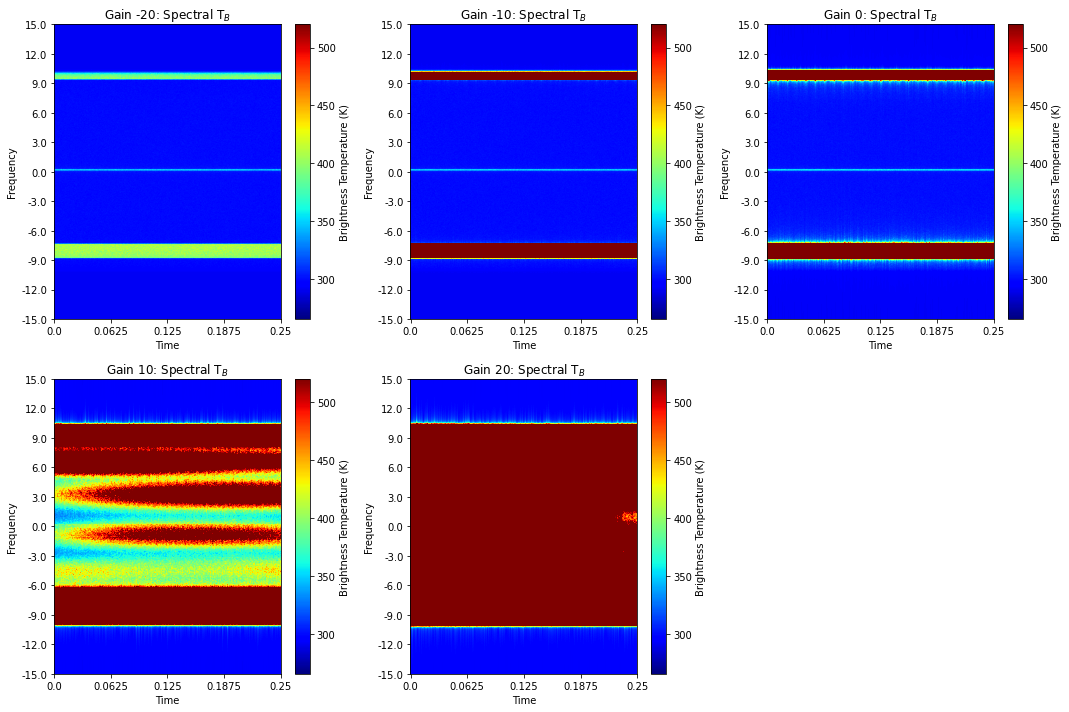

In [28]:
# Assuming you've loaded the data into these variables stft_h_spectral_G_m10, stft_h_spectral_G_m20, etc.
# Assuming you want to create subplots for all the spectral data, adjust this according to your requirement
data = [stft_h_spectral_G_m20 , stft_h_spectral_G_m10, stft_h_spectral_G_0 , stft_h_spectral_G_p10, stft_h_spectral_G_p20]
gains = [-20, -10, 0, 10, 20]
# Determine the number of rows and columns for subplots
num_plots = len(data)
num_rows = 2
num_cols = -(-num_plots // num_rows)  # Round up the division for columns

# Create a figure for subplots with the determined rows and columns
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Loop through the data and create subplots
for i, stft_h_spectral in enumerate(data):
    row = i // num_cols
    col = i % num_cols
    im = axs[row, col].imshow(stft_h_spectral, origin='lower', cmap='jet', aspect='auto', vmax=295, vmin=520)
    plt.colorbar(im, ax=axs[row, col], label='Brightness Temperature (K)')
    yaxis = np.ceil(np.linspace(-15, 15, 11))
    ylabel = np.linspace(0, len(stft_h_spectral), 11)
    xaxis = np.linspace(0, 0.25, 5)
    xlabel = np.linspace(0, len(stft_h_spectral[1]), 5)
    axs[row, col].set_title(f"Gain {gains[i]}:"" Spectral T$_{B}$")
    axs[row, col].set_yticks(ylabel)
    axs[row, col].set_yticklabels(yaxis)
    axs[row, col].set_xticks(xlabel)
    axs[row, col].set_xticklabels(xaxis)
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Frequency')

# Hide empty subplots if there are any
for i in range(num_plots, num_rows * num_cols):
    axs.flatten()[i].axis('off')

# Set the layout
plt.tight_layout()
plt.show()


In [29]:
avg_h_G_m10 = f3_G_m10["/L1B/TB/Avg/H-pol"][()]
avg_h_m20 = f3_G_m20["/L1B/TB/Avg/H-pol"][()]
avg_h__p10 = f3_G_p10["/L1B/TB/Avg/H-pol"][()]
avg_h__p20 = f3_G_p20["/L1B/TB/Avg/H-pol"][()]
avg_h_0 = f3_G_0["/L1B/TB/Avg/H-pol"][()]

In [30]:
GT = f3_G_0["/L1B/TB/GT/ground_truth_temp"][()]

In [31]:
avg_h_m20

array([303.81587174])

In [32]:
GT

array([296.5935])

In [33]:
diff_m10_GT = avg_h_G_m10 - GT
diff_m20_GT = avg_h_m20 - GT
diff_p10_GT = avg_h__p10 - GT
diff_p20_GT = avg_h__p20 - GT
diff_0_GT = avg_h_0 - GT
all_differences = np.array([diff_m20_GT, diff_m10_GT, diff_0_GT, diff_p10_GT, diff_p20_GT])

all_differences

array([[   7.22237174],
       [  69.09429835],
       [ 683.95583168],
       [3175.49999856],
       [4043.6454714 ]])

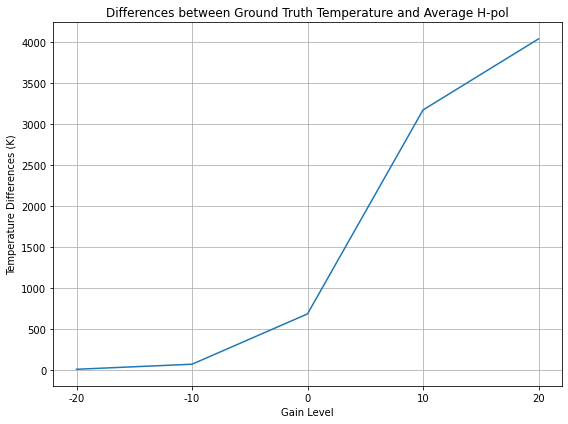

In [34]:
# Plotting the differences
plt.figure(figsize=(8, 6))
plt.plot((all_differences))
plt.title('Differences between Ground Truth Temperature and Average H-pol')
plt.ylabel('Temperature Differences (K)')
plt.xlabel('Gain Level')
plt.xticks(range(len(all_differences)),gains)
plt.grid()
plt.tight_layout()
plt.show()

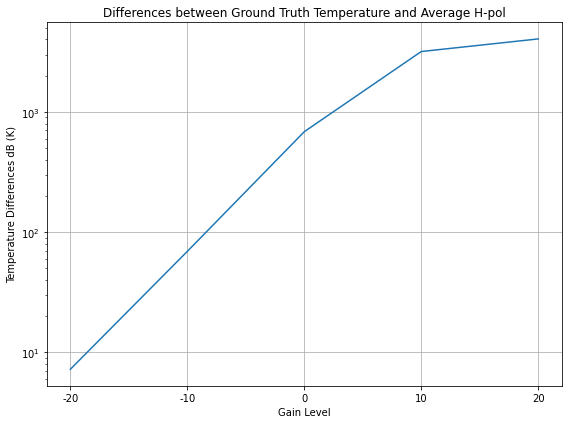

In [35]:
# Plotting the differences in DB scale
plt.figure(figsize=(8, 6))
plt.semilogy((all_differences))
plt.title('Differences between Ground Truth Temperature and Average H-pol')
plt.ylabel('Temperature Differences dB (K)')
plt.xlabel('Gain Level')
plt.grid()
plt.xticks(range(len(all_differences)),gains)
plt.tight_layout()
plt.show()

# RBG vs $\Delta T_B$

In [36]:
root_directory = r"Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1"

# Define lists for the parameters that change
fc_values = ['fc0']#,'fc1', 'fc2', 'fc3', 'fc4']#, 'fc5', 'fc6']
RB_values = ['2RB','4RB', '6RB','8RB', '16RB']
# RB_values = ['4RB',]
L_values = ['L0', 'L1A', 'L1B']
Gain_values = ['Gain-20', 'Gain-10', 'Gain0', 'Gain10', 'Gain20']  # Adjust Gain_values list

# Create a dictionary to store the files for each combination
files_dict = {}

for fc in fc_values:
    files_dict[fc] = {}
    for RB in RB_values:
        files_dict[fc][RB] = {}
        for L in L_values:
            files_dict[fc][RB][L] = {}
            for Gain in Gain_values:
                directory = os.path.join(root_directory, fc, RB, Gain, 'QPSK', L)
                if os.path.exists(directory):
                    files_dict[fc][RB][L][Gain] = os.listdir(directory)

In [37]:
key_to_read = "/L1B/TB/Avg/H-pol"
key_to_read_GT = "/L1B/TB/GT/ground_truth_temp"
L1B = ['L1B']
data_store = {}  # Dictionary to store data for different gains
data_store_GT = {}
for fc in fc_values:
    for RB in RB_values:
        for L in L1B:
            for Gain in Gain_values:
                file_list = []  # Reset file list for each combination
                if fc in files_dict and RB in files_dict[fc] and L in files_dict[fc][RB] and Gain in files_dict[fc][RB][L]:
                    files_in_directory = files_dict[fc][RB][L][Gain]
                    print(f"Files in {fc}/{RB}/{L}/{Gain}:")
                    for file in files_in_directory:
                        file_list.append(file)
                else:
                    print(f"Directory {fc}/{RB}/{L}/{Gain} not found or doesn't exist.")

                data_store[f"{fc}_{RB}_{L}_{Gain}"] = []
                data_store_GT[f"{fc}_{RB}_{L}_{Gain}"] = []# Initialize list for each combination

                for file_name in file_list:
                    file_path = os.path.join(root_directory, fc, RB, Gain, 'QPSK', L, file_name)
                    print(f"Reading file: {file_path}")

                    try:
                        with h5py.File(file_path, 'r') as file:
                            if key_to_read in file:
                                data = file[key_to_read][()]  # Access the data from the specified key
                                data_store[f"{fc}_{RB}_{L}_{Gain}"].append(data)
                                
                                data_GT = file[key_to_read_GT][()]  # Access the data from the specified key
                                data_store_GT[f"{fc}_{RB}_{L}_{Gain}"].append(data_GT)
                                
                            else:
                                print(f"Key {key_to_read} not found in file {file_name}")
                    except Exception as e:
                        print(f"Error reading file {file_name}: {e}")


Files in fc0/2RB/L1B/Gain-20:
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\2RB\Gain-20\QPSK\L1B\inband_2RB_Gain-20_QPSK_fc0_rfi_L1B_SN1.h5
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\2RB\Gain-20\QPSK\L1B\inband_2RB_Gain-20_QPSK_fc0_rfi_L1B_SN2.h5
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\2RB\Gain-20\QPSK\L1B\inband_2RB_Gain-20_QPSK_fc0_rfi_L1B_SN3.h5
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\2RB\Gain-20\QPSK\L1B\inband_2RB_Gain-20_QPSK_fc0_rfi_L1B_SN4.h5
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\2RB\Gain-20\QPSK\L1B\inband_2RB_Gain-20_QPSK_fc0_rfi_L1B_SN5.h5
Files in fc0/2RB/L1B/Gain-10:
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\2RB\Gain-10\QPSK\L1B\inband_2RB_Gain-10_QPSK_fc0_rfi_L1B_SN1.h5
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\2RB\Gain-10\QPSK\L1B\inb

Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\4RB\Gain-10\QPSK\L1B\inband_4RB_Gain-10_QPSK_fc0_rfi_L1B_SN5.h5
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\4RB\Gain-10\QPSK\L1B\inband_4RB_Gain-10_QPSK_fc0_rfi_L1B_SN6.h5
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\4RB\Gain-10\QPSK\L1B\inband_4RB_Gain-10_QPSK_fc0_rfi_L1B_SN7.h5
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\4RB\Gain-10\QPSK\L1B\inband_4RB_Gain-10_QPSK_fc0_rfi_L1B_SN8.h5
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\4RB\Gain-10\QPSK\L1B\inband_4RB_Gain-10_QPSK_fc0_rfi_L1B_SN9.h5
Files in fc0/4RB/L1B/Gain0:
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\4RB\Gain0\QPSK\L1B\inband_4RB_Gain0_QPSK_fc0_rfi_L1B_SN1.h5
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\4RB\Gain0\QPSK\L1B\inband_4RB_Gain0_QPSK_fc0_rfi_L1B_SN10.h5

Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\6RB\Gain0\QPSK\L1B\inband_6RB_Gain0_QPSK_fc0_rfi_L1B_SN3.h5
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\6RB\Gain0\QPSK\L1B\inband_6RB_Gain0_QPSK_fc0_rfi_L1B_SN4.h5
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\6RB\Gain0\QPSK\L1B\inband_6RB_Gain0_QPSK_fc0_rfi_L1B_SN5.h5
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\6RB\Gain0\QPSK\L1B\inband_6RB_Gain0_QPSK_fc0_rfi_L1B_SN6.h5
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\6RB\Gain0\QPSK\L1B\inband_6RB_Gain0_QPSK_fc0_rfi_L1B_SN7.h5
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\6RB\Gain0\QPSK\L1B\inband_6RB_Gain0_QPSK_fc0_rfi_L1B_SN8.h5
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\6RB\Gain0\QPSK\L1B\inband_6RB_Gain0_QPSK_fc0_rfi_L1B_SN9.h5
Files in fc0/6RB/L1B/Gain10:
Reading file: Z:/Da

Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\8RB\Gain10\QPSK\L1B\inband_8RB_Gain10_QPSK_fc0_rfi_L1B_SN4.h5
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\8RB\Gain10\QPSK\L1B\inband_8RB_Gain10_QPSK_fc0_rfi_L1B_SN5.h5
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\8RB\Gain10\QPSK\L1B\inband_8RB_Gain10_QPSK_fc0_rfi_L1B_SN6.h5
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\8RB\Gain10\QPSK\L1B\inband_8RB_Gain10_QPSK_fc0_rfi_L1B_SN7.h5
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\8RB\Gain10\QPSK\L1B\inband_8RB_Gain10_QPSK_fc0_rfi_L1B_SN8.h5
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\8RB\Gain10\QPSK\L1B\inband_8RB_Gain10_QPSK_fc0_rfi_L1B_SN9.h5
Files in fc0/8RB/L1B/Gain20:
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\8RB\Gain20\QPSK\L1B\inband_8RB_Gain20_QPSK_fc0_rfi_L1B_SN1.h5
Readi

Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\16RB\Gain20\QPSK\L1B\inband_16RB_Gain20_QPSK_fc0_rfi_L1B_SN3.h5
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\16RB\Gain20\QPSK\L1B\inband_16RB_Gain20_QPSK_fc0_rfi_L1B_SN4.h5
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\16RB\Gain20\QPSK\L1B\inband_16RB_Gain20_QPSK_fc0_rfi_L1B_SN5.h5
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\16RB\Gain20\QPSK\L1B\inband_16RB_Gain20_QPSK_fc0_rfi_L1B_SN6.h5
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\16RB\Gain20\QPSK\L1B\inband_16RB_Gain20_QPSK_fc0_rfi_L1B_SN7.h5
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\16RB\Gain20\QPSK\L1B\inband_16RB_Gain20_QPSK_fc0_rfi_L1B_SN8.h5
Reading file: Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1\fc0\16RB\Gain20\QPSK\L1B\inband_16RB_Gain20_QPSK_fc0_rfi_L1B_SN9.h5


In [38]:
# Initialize mean_data_store to store mean data for different fc and gain combinations
mean_data_store = {}  
mean_data_store_GT = {} 
# RB_value_analysis = ['4RB']
RB_value_analysis = RB_values
# Iterate over fc values
for fc in fc_values:
    for Gain in Gain_values:
        # Iterate over RB values
        for RB in RB_value_analysis:
            combined_data = []
            # Check if this combination of fc, RB, L, and gain exists in the data store
            data_key = f"{fc}_{RB}_L1B_{Gain}"
            if data_key in data_store:
                combined_data.extend(data_store[data_key])
        # Calculate the mean for this fc and gain across all RBs
            mean_data_store[f"{RB}_{fc}_{Gain}"] = np.mean(combined_data, axis=0)

print(mean_data_store)

for fc in fc_values:
    for Gain in Gain_values:
        # Iterate over RB values
        for RB in RB_value_analysis:
            combined_data = []
            # Check if this combination of fc, RB, L, and gain exists in the data store
            data_key = f"{fc}_{RB}_L1B_{Gain}"
            if data_key in data_store_GT:
                combined_data.extend(data_store_GT[data_key])
        # Calculate the mean for this fc and gain across all RBs
            mean_data_store_GT[f"{RB}_{fc}_{Gain}"] = np.mean(combined_data, axis=0)

print(mean_data_store_GT)


{'2RB_fc0_Gain-20': array([303.8017737]), '4RB_fc0_Gain-20': array([315.70406519]), '6RB_fc0_Gain-20': array([321.21819858]), '8RB_fc0_Gain-20': array([665.60578405]), '16RB_fc0_Gain-20': array([372.13173161]), '2RB_fc0_Gain-10': array([365.63101694]), '4RB_fc0_Gain-10': array([478.00052134]), '6RB_fc0_Gain-10': array([548.58495442]), '8RB_fc0_Gain-10': array([666.83557432]), '16RB_fc0_Gain-10': array([1025.68557516]), '2RB_fc0_Gain0': array([980.61868189]), '4RB_fc0_Gain0': array([1962.23949271]), '6RB_fc0_Gain0': array([2455.69480956]), '8RB_fc0_Gain0': array([3047.93001585]), '16RB_fc0_Gain0': array([4012.95674398]), '2RB_fc0_Gain10': array([3460.07648676]), '4RB_fc0_Gain10': array([4467.8968981]), '6RB_fc0_Gain10': array([4709.78368042]), '8RB_fc0_Gain10': array([4827.64702431]), '16RB_fc0_Gain10': array([5040.59024504]), '2RB_fc0_Gain20': array([4370.07253349]), '4RB_fc0_Gain20': array([4946.58078024]), '6RB_fc0_Gain20': array([5069.24984126]), '8RB_fc0_Gain20': array([4789.804079

In [39]:
del_t = {}
for key in mean_data_store:
    if key in mean_data_store_GT:
        del_t[key] = mean_data_store[key] - mean_data_store_GT[key]
    else:
        # Handle the case where keys are not matched
        pass

(array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
 [Text(0, 0.1, '$\\mathdefault{10^{-1}}$'),
  Text(0, 1.0, '$\\mathdefault{10^{0}}$'),
  Text(0, 10.0, '$\\mathdefault{10^{1}}$'),
  Text(0, 100.0, '$\\mathdefault{10^{2}}$'),
  Text(0, 1000.0, '$\\mathdefault{10^{3}}$'),
  Text(0, 10000.0, '$\\mathdefault{10^{4}}$'),
  Text(0, 100000.0, '$\\mathdefault{10^{5}}$')])

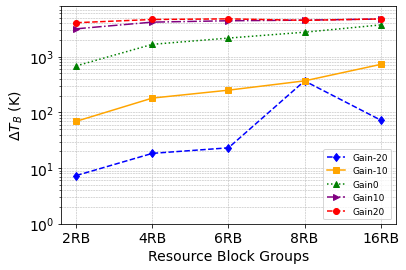

In [40]:

Gain_values = ['Gain-20', 'Gain-10', 'Gain0', 'Gain10', 'Gain20']  # Adjust Gain_values list
# x_labels = [f"fc{i}" for i in range(0, 5)]
# formatted_labels = [r'$f_{c_{%s}}^{t}$' % label[2:] for label in x_labels]
x_labels = RB_values
x = np.arange(len(x_labels))

colors = ['blue', 'orange', 'green', 'purple', 'red']
linestyle_array = ['--','-',':','-.','--']
marker = ['d','s','^','>','o']

# plt.figure(figsize=(10, 6))

fig, ax1 = plt.subplots()
# Data for Gain values -20, -10, 0, 10
for i, Gain in enumerate(Gain_values):
    values = [del_t[f"{RB_values[i]}_fc0_{Gain}"][0] for i in range(len(x_labels))]
    ax1.semilogy((x), np.abs(values), linestyle=linestyle_array[i], label=f"{Gain}", color=colors[i],marker=marker[i])
#smap_res = .23 * np.ones(len(x_labels))
#ax1.semilogy((x), np.abs(smap_res), linestyle=':', color='magenta', label='Radiometer Uncertainty',marker='x')
ax1.set_xlabel('Resource Block Groups', fontsize=14)
ax1.set_ylabel('$\Delta T_B$ (K)', color='black', fontsize=14)  # Label for the first y-axis
ax1.tick_params('y', colors='black')  # Color for the ticks on the first y-axis
# ax1.legend(loc='upper right')
nticks=5
a=1e0
b=8000
ax1.set_ylim(a,b)
# Create a single legend by using handles and labels
ax1.legend(loc='lower right',fontsize=9)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(x, x_labels,fontsize=14)
plt.yticks(fontsize=14)

# 6RBG

In [41]:
dirct_L1B_G_m10 ="Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1/fc0/6RB/Gain-10/QPSK/L1B"
dirct_L1B_G_m20 ="Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1/fc0/6RB/Gain-20/QPSK/L1B"
dirct_L1B_G_p10 ="Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1/fc0/6RB/Gain10/QPSK/L1B"
dirct_L1B_G_p20 ="Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1/fc0/6RB/Gain20/QPSK/L1B"
dirct_L1B_G_0 ="Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1/fc0/6RB/Gain0/QPSK/L1B"

filename_L1B_G_m10=[]
filename_L1B_G_m20=[]
filename_L1B_G_p10=[]
filename_L1B_G_p20=[]
filename_L1B_G_0=[]

for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_m10,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_m10.append( infile)
for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_m20,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_m20.append( infile)
for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_p10,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_p10.append( infile)
for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_p20,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_p20.append( infile)
for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_0,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_0.append( infile)
    
index_sample = 6
# Checking a particular sample
f3_G_m10 = h5py.File(filename_L1B_G_m10[index_sample],'r')
f3_G_m20 = h5py.File(filename_L1B_G_m20[index_sample],'r') 
f3_G_p10 = h5py.File(filename_L1B_G_p10[index_sample],'r')
f3_G_p20 = h5py.File(filename_L1B_G_p20[index_sample],'r') 
f3_G_0 = h5py.File(filename_L1B_G_0[index_sample],'r') 


stft_h_spectral_G_m10 = f3_G_m10["/L1B/TB/Spectral/H-pol"][()]
stft_h_spectral_G_m20 = f3_G_m20["/L1B/TB/Spectral/H-pol"][()]
stft_h_spectral_G_p10 = f3_G_p10["/L1B/TB/Spectral/H-pol"][()]
stft_h_spectral_G_p20 = f3_G_p20["/L1B/TB/Spectral/H-pol"][()]
stft_h_spectral_G_0 = f3_G_0["/L1B/TB/Spectral/H-pol"][()]

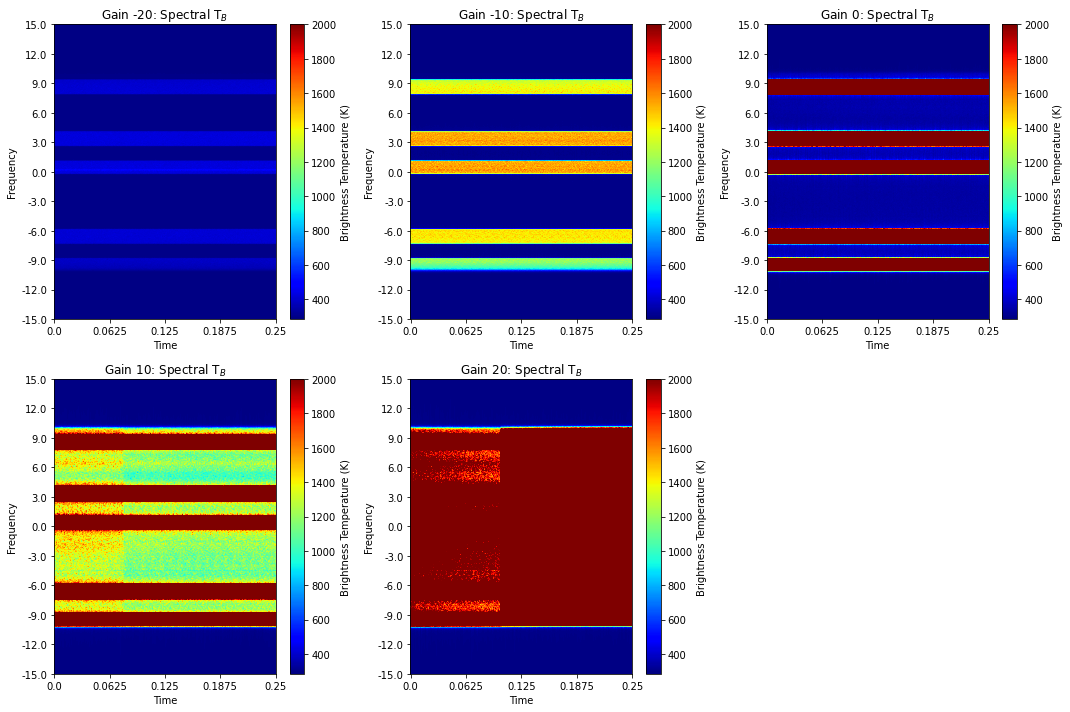

In [42]:
# Assuming you've loaded the data into these variables stft_h_spectral_G_m10, stft_h_spectral_G_m20, etc.

# Assuming you want to create subplots for all the spectral data, adjust this according to your requirement
data = [stft_h_spectral_G_m20 , stft_h_spectral_G_m10, stft_h_spectral_G_0 , stft_h_spectral_G_p10, stft_h_spectral_G_p20]
gains = [-20, -10, 0, 10, 20]
# Determine the number of rows and columns for subplots
num_plots = len(data)
num_rows = 2
num_cols = -(-num_plots // num_rows)  # Round up the division for columns

# Create a figure for subplots with the determined rows and columns
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Loop through the data and create subplots
for i, stft_h_spectral in enumerate(data):
    row = i // num_cols
    col = i % num_cols
    im = axs[row, col].imshow(stft_h_spectral, origin='lower', cmap='jet', aspect='auto', vmax=2000, vmin=285)
    plt.colorbar(im, ax=axs[row, col], label='Brightness Temperature (K)')
    yaxis = np.ceil(np.linspace(-15, 15, 11))
    ylabel = np.linspace(0, len(stft_h_spectral), 11)
    xaxis = np.linspace(0, 0.25, 5)
    xlabel = np.linspace(0, len(stft_h_spectral[1]), 5)
    axs[row, col].set_title(f"Gain {gains[i]}:"" Spectral T$_{B}$")
    axs[row, col].set_yticks(ylabel)
    axs[row, col].set_yticklabels(yaxis)
    axs[row, col].set_xticks(xlabel)
    axs[row, col].set_xticklabels(xaxis)
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Frequency')

# Hide empty subplots if there are any
for i in range(num_plots, num_rows * num_cols):
    axs.flatten()[i].axis('off')

# Set the layout
plt.tight_layout()
plt.show()


## 4RBG

In [43]:
dirct_L1B_G_m10 ="Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1/fc0/4RB/Gain-10/QPSK/L1B"
dirct_L1B_G_m20 ="Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1/fc0/4RB/Gain-20/QPSK/L1B"
dirct_L1B_G_p10 ="Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1/fc0/4RB/Gain10/QPSK/L1B"
dirct_L1B_G_p20 ="Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1/fc0/4RB/Gain20/QPSK/L1B"
dirct_L1B_G_0 ="Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/inband_v1/fc0/4RB/Gain0/QPSK/L1B"


filename_L1B_G_m10=[]
filename_L1B_G_m20=[]
filename_L1B_G_p10=[]
filename_L1B_G_p20=[]
filename_L1B_G_0=[]

for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_m10,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_m10.append( infile)
for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_m20,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_m20.append( infile)
for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_p10,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_p10.append( infile)
for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_p20,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_p20.append( infile)
for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_0,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_0.append( infile)
    
index_sample = 0
# Checking a particular sample
f3_G_m10 = h5py.File(filename_L1B_G_m10[index_sample],'r')
f3_G_m20 = h5py.File(filename_L1B_G_m20[index_sample],'r') 
f3_G_p10 = h5py.File(filename_L1B_G_p10[index_sample],'r')
f3_G_p20 = h5py.File(filename_L1B_G_p20[index_sample],'r') 
f3_G_0 = h5py.File(filename_L1B_G_0[index_sample],'r') 


stft_h_spectral_G_m10 = f3_G_m10["/L1B/TB/Spectral/H-pol"][()]
stft_h_spectral_G_m20 = f3_G_m20["/L1B/TB/Spectral/H-pol"][()]
stft_h_spectral_G_p10 = f3_G_p10["/L1B/TB/Spectral/H-pol"][()]
stft_h_spectral_G_p20 = f3_G_p20["/L1B/TB/Spectral/H-pol"][()]
stft_h_spectral_G_0 = f3_G_0["/L1B/TB/Spectral/H-pol"][()]

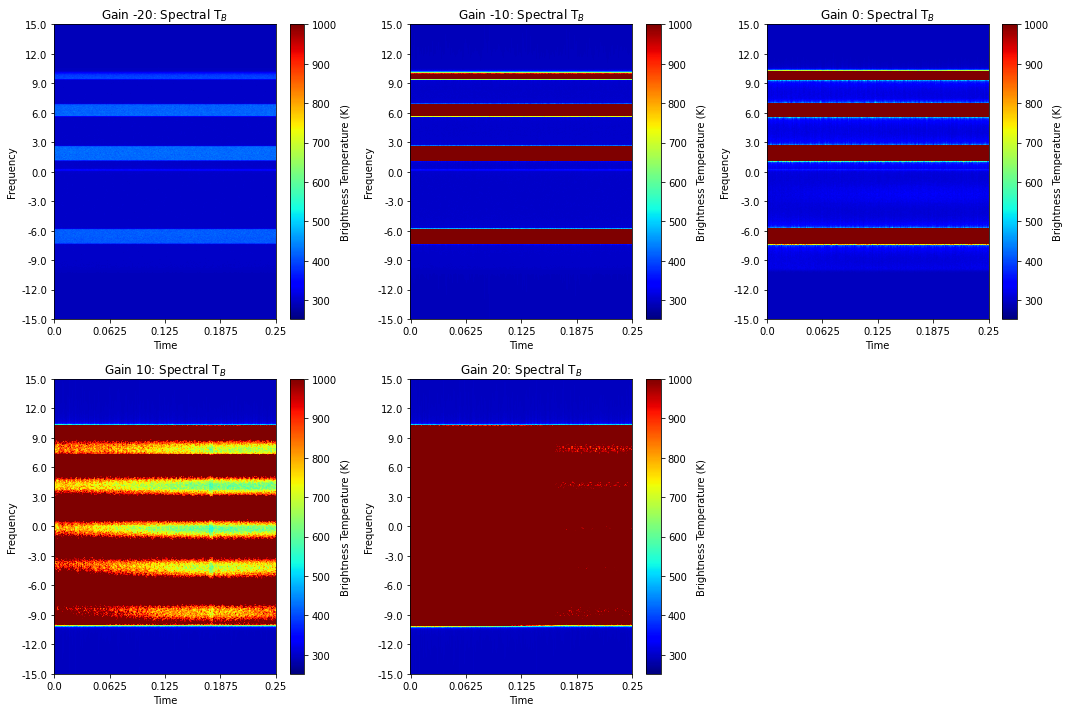

In [44]:
# Assuming you've loaded the data into these variables stft_h_spectral_G_m10, stft_h_spectral_G_m20, etc.

# Assuming you want to create subplots for all the spectral data, adjust this according to your requirement
data = [stft_h_spectral_G_m20 , stft_h_spectral_G_m10, stft_h_spectral_G_0 , stft_h_spectral_G_p10, stft_h_spectral_G_p20]
gains = [-20, -10, 0, 10, 20]
# Determine the number of rows and columns for subplots
num_plots = len(data)
num_rows = 2
num_cols = -(-num_plots // num_rows)  # Round up the division for columns

# Create a figure for subplots with the determined rows and columns
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Loop through the data and create subplots
for i, stft_h_spectral in enumerate(data):
    row = i // num_cols
    col = i % num_cols
    im = axs[row, col].imshow(stft_h_spectral, origin='lower', cmap='jet', aspect='auto', vmax=280, vmin=1000)
    plt.colorbar(im, ax=axs[row, col], label='Brightness Temperature (K)')
    yaxis = np.ceil(np.linspace(-15, 15, 11))
    ylabel = np.linspace(0, len(stft_h_spectral), 11)
    xaxis = np.linspace(0, 0.25, 5)
    xlabel = np.linspace(0, len(stft_h_spectral[1]), 5)
    axs[row, col].set_title(f"Gain {gains[i]}:"" Spectral T$_{B}$")
    axs[row, col].set_yticks(ylabel)
    axs[row, col].set_yticklabels(yaxis)
    axs[row, col].set_xticks(xlabel)
    axs[row, col].set_xticklabels(xaxis)
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Frequency')

# Hide empty subplots if there are any
for i in range(num_plots, num_rows * num_cols):
    axs.flatten()[i].axis('off')

# Set the layout
plt.tight_layout()
plt.show()


## b) Transition band ($f_{c_1}^t$)

In [45]:
dirct_L1B_G_m10 =r"Z:\Data Files\SWIFT\HDF_processed_version_1\RFI\transitionband_v1\fc1\4RB\Gain-20\QPSK\L1B"
dirct_L1B_G_m20 =r"Z:\Data Files\SWIFT\HDF_processed_version_1\RFI\transitionband_v1\fc1\4RB\Gain-20\QPSK\L1B"
dirct_L1B_G_p10 =r"Z:\Data Files\SWIFT\HDF_processed_version_1\RFI\transitionband_v1\fc1\4RB\Gain10\QPSK\L1B"
dirct_L1B_G_p20 =r"Z:\Data Files\SWIFT\HDF_processed_version_1\RFI\transitionband_v1\fc1\4RB\Gain20\QPSK\L1B"
dirct_L1B_G_0 =r"Z:\Data Files\SWIFT\HDF_processed_version_1\RFI\transitionband_v1\fc1\4RB\Gain0\QPSK\L1B"

filename_L1B_G_m10=[]
filename_L1B_G_m20=[]
filename_L1B_G_p10=[]
filename_L1B_G_p20=[]
filename_L1B_G_0=[]

for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_m10,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_m10.append( infile)
for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_m20,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_m20.append( infile)
for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_p10,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_p10.append( infile)
for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_p20,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_p20.append( infile)
for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_0,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_0.append( infile)
    
index_sample = 0
# Checking a particular sample
f3_G_m10 = h5py.File(filename_L1B_G_m10[index_sample],'r')
f3_G_m20 = h5py.File(filename_L1B_G_m20[index_sample],'r') 
f3_G_p10 = h5py.File(filename_L1B_G_p10[index_sample],'r')
f3_G_p20 = h5py.File(filename_L1B_G_p20[index_sample],'r') 
f3_G_0 = h5py.File(filename_L1B_G_0[index_sample],'r') 


stft_h_spectral_G_m10 = f3_G_m10["/L1B/TB/Spectral/H-pol"][()]
stft_h_spectral_G_m20 = f3_G_m20["/L1B/TB/Spectral/H-pol"][()]
stft_h_spectral_G_p10 = f3_G_p10["/L1B/TB/Spectral/H-pol"][()]
stft_h_spectral_G_p20 = f3_G_p20["/L1B/TB/Spectral/H-pol"][()]
stft_h_spectral_G_0 = f3_G_0["/L1B/TB/Spectral/H-pol"][()]

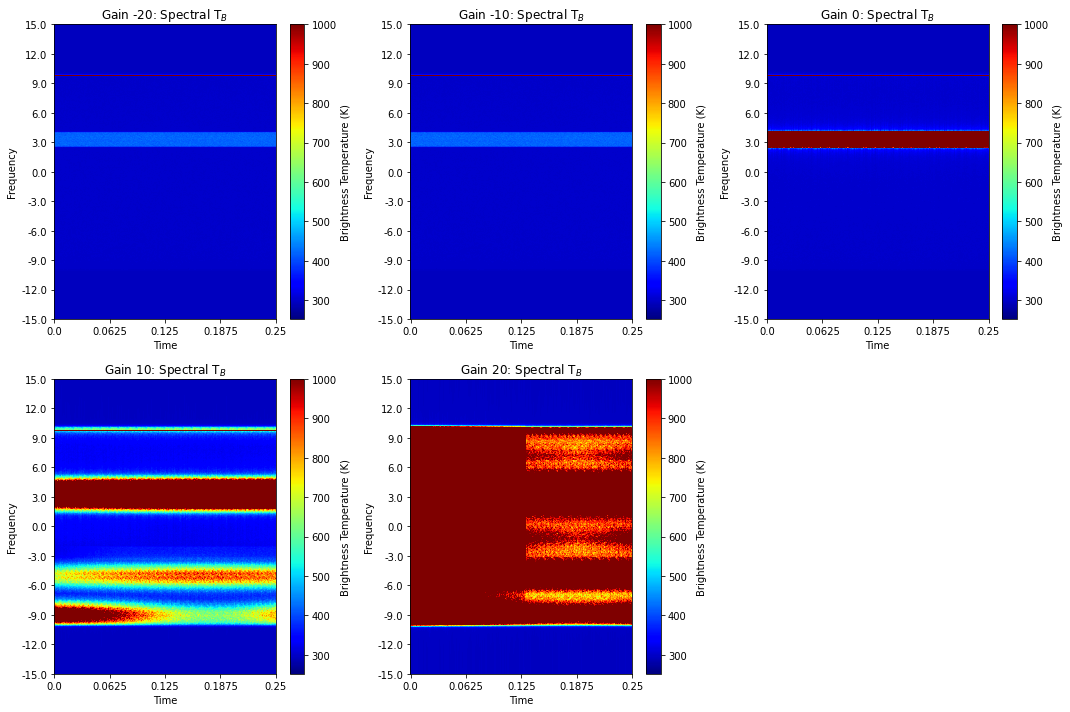

In [46]:
# Assuming you've loaded the data into these variables stft_h_spectral_G_m10, stft_h_spectral_G_m20, etc.
# Assuming you want to create subplots for all the spectral data, adjust this according to your requirement
data = [stft_h_spectral_G_m20 , stft_h_spectral_G_m10, stft_h_spectral_G_0 , stft_h_spectral_G_p10, stft_h_spectral_G_p20]
gains = [-20, -10, 0, 10, 20]
# Determine the number of rows and columns for subplots
num_plots = len(data)
num_rows = 2
num_cols = -(-num_plots // num_rows)  # Round up the division for columns

# Create a figure for subplots with the determined rows and columns
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Loop through the data and create subplots
for i, stft_h_spectral in enumerate(data):
    row = i // num_cols
    col = i % num_cols
    im = axs[row, col].imshow(stft_h_spectral, origin='lower', cmap='jet', aspect='auto', vmax=280, vmin=1000)
    plt.colorbar(im, ax=axs[row, col], label='Brightness Temperature (K)')
    yaxis = np.ceil(np.linspace(-15, 15, 11))
    ylabel = np.linspace(0, len(stft_h_spectral), 11)
    xaxis = np.linspace(0, 0.25, 5)
    xlabel = np.linspace(0, len(stft_h_spectral[1]), 5)
    axs[row, col].set_title(f"Gain {gains[i]}:"" Spectral T$_{B}$")
    axs[row, col].set_yticks(ylabel)
    axs[row, col].set_yticklabels(yaxis)
    axs[row, col].set_xticks(xlabel)
    axs[row, col].set_xticklabels(xaxis)
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Frequency')

# Hide empty subplots if there are any
for i in range(num_plots, num_rows * num_cols):
    axs.flatten()[i].axis('off')

# Set the layout
plt.tight_layout()
plt.show()

## Out-Of-Band ($f_{c_1}^t$)

In [47]:
dirct_L1B_G_m10 ="Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/outband_v1/fc1/6RB/Gain-10/QPSK/L1B"
dirct_L1B_G_m20 ="Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/outband_v1/fc1/6RB/Gain-20/QPSK/L1B"
dirct_L1B_G_p10 ="Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/outband_v1/fc1/6RB/Gain10/QPSK/L1B"
dirct_L1B_G_p20 ="Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/outband_v1/fc1/6RB/Gain20/QPSK/L1B"
dirct_L1B_G_0 ="Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/outband_v1/fc1/6RB/Gain0/QPSK/L1B"

filename_L1B_G_m10=[]
filename_L1B_G_m20=[]
filename_L1B_G_p10=[]
filename_L1B_G_p20=[]
filename_L1B_G_0=[]

for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_m10,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_m10.append( infile)
for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_m20,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_m20.append( infile)
for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_p10,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_p10.append( infile)
for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_p20,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_p20.append( infile)
for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_0,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_0.append( infile)
    
index_sample = 0
# Checking a particular sample
f3_G_m10 = h5py.File(filename_L1B_G_m10[index_sample],'r')
f3_G_m20 = h5py.File(filename_L1B_G_m20[index_sample],'r') 
f3_G_p10 = h5py.File(filename_L1B_G_p10[index_sample],'r')
f3_G_p20 = h5py.File(filename_L1B_G_p20[index_sample],'r') 
f3_G_0 = h5py.File(filename_L1B_G_0[index_sample],'r') 


stft_h_spectral_G_m10 = f3_G_m10["/L1B/TB/Spectral/H-pol"][()]
stft_h_spectral_G_m20 = f3_G_m20["/L1B/TB/Spectral/H-pol"][()]
stft_h_spectral_G_p10 = f3_G_p10["/L1B/TB/Spectral/H-pol"][()]
stft_h_spectral_G_p20 = f3_G_p20["/L1B/TB/Spectral/H-pol"][()]
stft_h_spectral_G_0 = f3_G_0["/L1B/TB/Spectral/H-pol"][()]

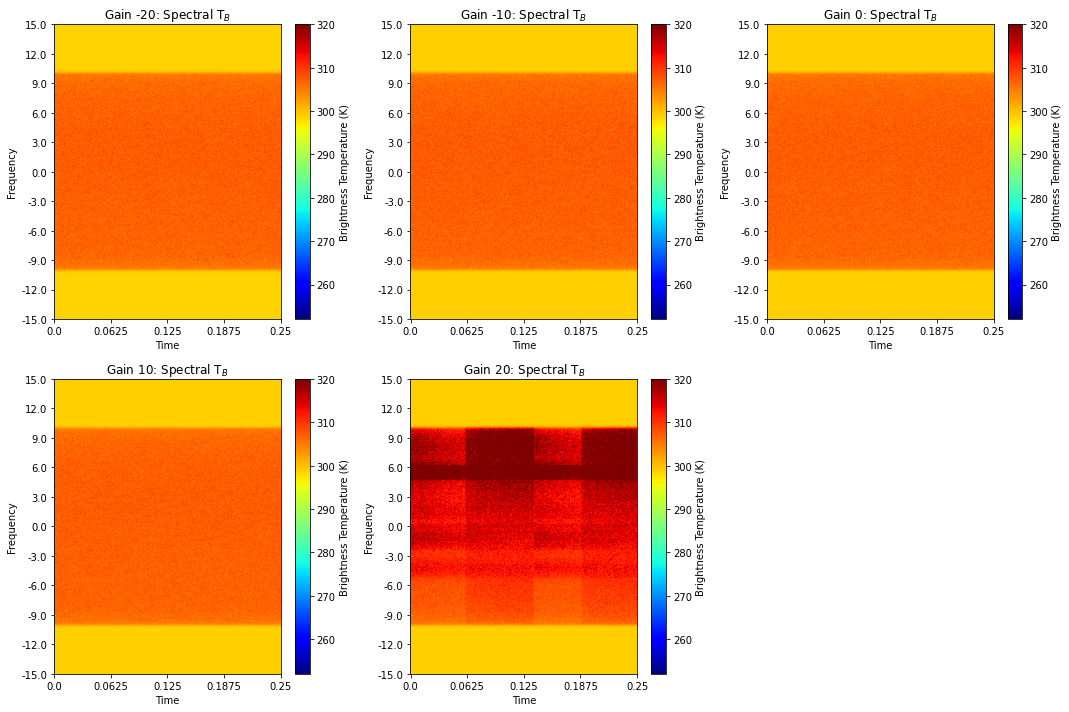

In [48]:
# Assuming you've loaded the data into these variables stft_h_spectral_G_m10, stft_h_spectral_G_m20, etc.

# Assuming you want to create subplots for all the spectral data, adjust this according to your requirement
data = [stft_h_spectral_G_m20 , stft_h_spectral_G_m10, stft_h_spectral_G_0 , stft_h_spectral_G_p10, stft_h_spectral_G_p20]
gains = [-20, -10, 0, 10, 20]
# Determine the number of rows and columns for subplots
num_plots = len(data)
num_rows = 2
num_cols = -(-num_plots // num_rows)  # Round up the division for columns

# Create a figure for subplots with the determined rows and columns
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Loop through the data and create subplots
for i, stft_h_spectral in enumerate(data):
    row = i // num_cols
    col = i % num_cols
    im = axs[row, col].imshow(stft_h_spectral, origin='lower', cmap='jet', aspect='auto', vmax=280, vmin=320)
    plt.colorbar(im, ax=axs[row, col], label='Brightness Temperature (K)')
    yaxis = np.ceil(np.linspace(-15, 15, 11))
    ylabel = np.linspace(0, len(stft_h_spectral), 11)
    xaxis = np.linspace(0, 0.25, 5)
    xlabel = np.linspace(0, len(stft_h_spectral[1]), 5)
    axs[row, col].set_title(f"Gain {gains[i]}:"" Spectral T$_{B}$")
    axs[row, col].set_yticks(ylabel)
    axs[row, col].set_yticklabels(yaxis)
    axs[row, col].set_xticks(xlabel)
    axs[row, col].set_xticklabels(xaxis)
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Frequency')

# Hide empty subplots if there are any
for i in range(num_plots, num_rows * num_cols):
    axs.flatten()[i].axis('off')

# Set the layout
plt.tight_layout()
plt.show()


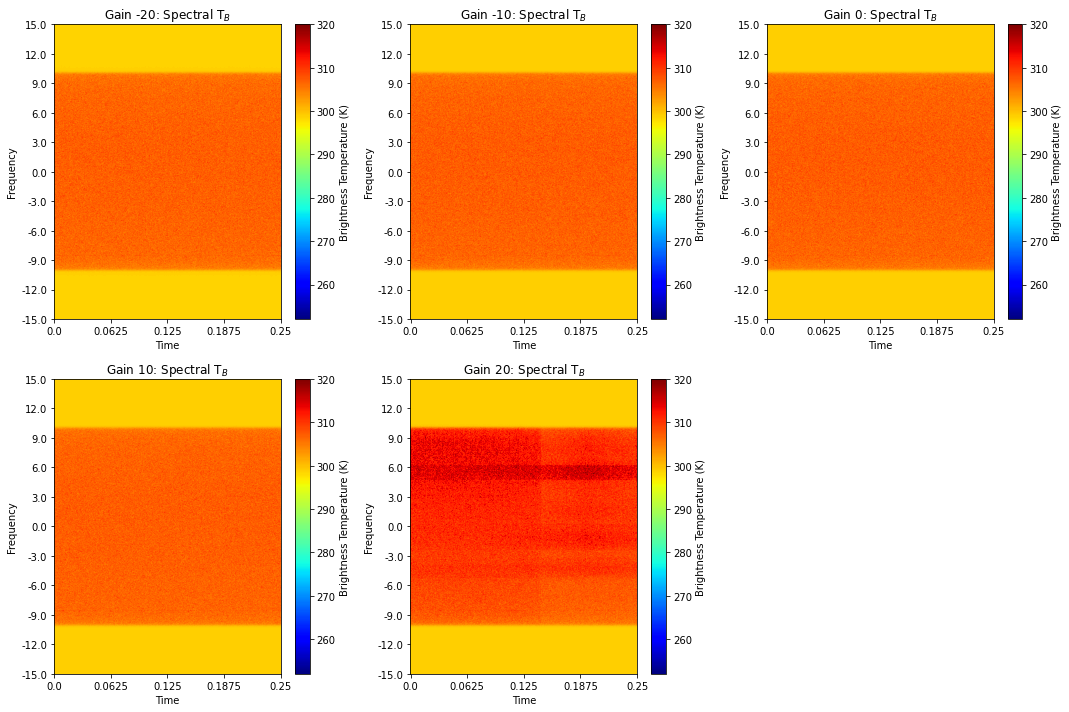

In [49]:
stft_h_spectral_G_m10 = f3_G_m10["/L1B/TB/Spectral/V-pol"][()]
stft_h_spectral_G_m20 = f3_G_m20["/L1B/TB/Spectral/V-pol"][()]
stft_h_spectral_G_p10 = f3_G_p10["/L1B/TB/Spectral/V-pol"][()]
stft_h_spectral_G_p20 = f3_G_p20["/L1B/TB/Spectral/V-pol"][()]
stft_h_spectral_G_0 = f3_G_0["/L1B/TB/Spectral/V-pol"][()]


# Assuming you've loaded the data into these variables stft_h_spectral_G_m10, stft_h_spectral_G_m20, etc.

# Assuming you want to create subplots for all the spectral data, adjust this according to your requirement
data = [stft_h_spectral_G_m20 , stft_h_spectral_G_m10, stft_h_spectral_G_0 , stft_h_spectral_G_p10, stft_h_spectral_G_p20]
gains = [-20, -10, 0, 10, 20]
# Determine the number of rows and columns for subplots
num_plots = len(data)
num_rows = 2
num_cols = -(-num_plots // num_rows)  # Round up the division for columns

# Create a figure for subplots with the determined rows and columns
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Loop through the data and create subplots
for i, stft_h_spectral in enumerate(data):
    row = i // num_cols
    col = i % num_cols
    im = axs[row, col].imshow(stft_h_spectral, origin='lower', cmap='jet', aspect='auto', vmax=280, vmin=320)
    plt.colorbar(im, ax=axs[row, col], label='Brightness Temperature (K)')
    yaxis = np.ceil(np.linspace(-15, 15, 11))
    ylabel = np.linspace(0, len(stft_h_spectral), 11)
    xaxis = np.linspace(0, 0.25, 5)
    xlabel = np.linspace(0, len(stft_h_spectral[1]), 5)
    axs[row, col].set_title(f"Gain {gains[i]}:"" Spectral T$_{B}$")
    axs[row, col].set_yticks(ylabel)
    axs[row, col].set_yticklabels(yaxis)
    axs[row, col].set_xticks(xlabel)
    axs[row, col].set_xticklabels(xaxis)
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Frequency')

# Hide empty subplots if there are any
for i in range(num_plots, num_rows * num_cols):
    axs.flatten()[i].axis('off')

# Set the layout
plt.tight_layout()
plt.show()



In [50]:
dirct_L1B_G_m10 ="Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/outband_v1/fc1/4RB/Gain-10/QPSK/L1A"
dirct_L1B_G_m20 ="Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/outband_v1/fc1/4RB/Gain-20/QPSK/L1A"
dirct_L1B_G_p10 ="Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/outband_v1/fc1/4RB/Gain10/QPSK/L1A"
dirct_L1B_G_p20 ="Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/outband_v1/fc1/4RB/Gain20/QPSK/L1A"
dirct_L1B_G_0 ="Z:/Data Files/SWIFT/HDF_processed_version_1/RFI/outband_v1/fc1/4RB/Gain0/QPSK/L1A"

filename_L1B_G_m10=[]
filename_L1B_G_m20=[]
filename_L1B_G_p10=[]
filename_L1B_G_p20=[]
filename_L1B_G_0=[]

for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_m10,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_m10.append( infile)
for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_m20,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_m20.append( infile)
for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_p10,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_p10.append( infile)
for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_p20,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_p20.append( infile)
for infile in sorted(glob.glob(os.path.join(dirct_L1B_G_0,'*.h5')), key=numericalSort):
    # print ("Current File Being Processed is: " + infile)
    filename_L1B_G_0.append( infile)
    
index_sample = 0
# Checking a particular sample
f3_G_m10 = h5py.File(filename_L1B_G_m10[index_sample],'r')
f3_G_m20 = h5py.File(filename_L1B_G_m20[index_sample],'r') 
f3_G_p10 = h5py.File(filename_L1B_G_p10[index_sample],'r')
f3_G_p20 = h5py.File(filename_L1B_G_p20[index_sample],'r') 
f3_G_0 = h5py.File(filename_L1B_G_0[index_sample],'r') 


stft_h_spectral_G_m10 = f3_G_m10["/L1A/STFT/H-pol/stft_h_irr"][()]
stft_h_spectral_G_m20 = f3_G_m20["/L1A/STFT/H-pol/stft_h_irr"][()]
stft_h_spectral_G_p10 = f3_G_p10["/L1A/STFT/H-pol/stft_h_irr"][()]
stft_h_spectral_G_p20 = f3_G_p20["/L1A/STFT/H-pol/stft_h_irr"][()]
stft_h_spectral_G_0 = f3_G_0["/L1A/STFT/H-pol/stft_h_irr"][()]




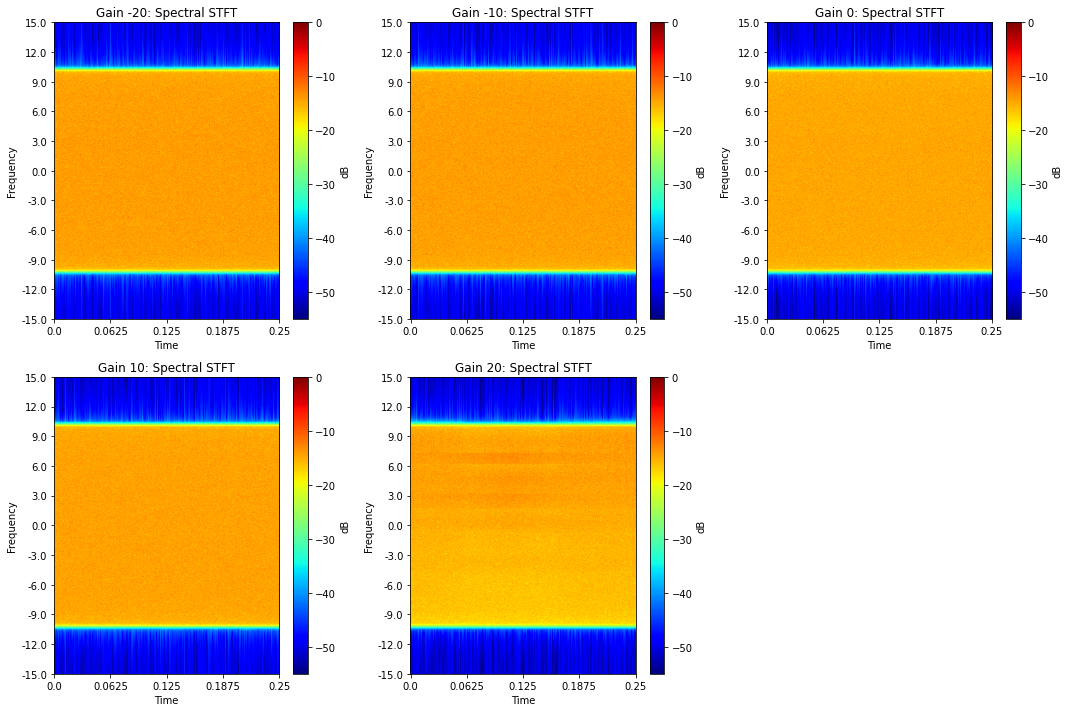

In [51]:

# Assuming you've loaded the data into these variables stft_h_spectral_G_m10, stft_h_spectral_G_m20, etc.

#y_abs1=np.abs(stft_h_unfilter_dataset)
#global_maximum = 1
#global_maximum = np.amax(y_abs1)
#y_res1 = 20*np.log10(y_abs1/global_maximum)


# Assuming you want to create subplots for all the spectral data, adjust this according to your requirement
data = [stft_h_spectral_G_m20 , stft_h_spectral_G_m10, stft_h_spectral_G_0 , stft_h_spectral_G_p10, stft_h_spectral_G_p20]
gains = [-20, -10, 0, 10, 20]
# Determine the number of rows and columns for subplots
num_plots = len(data)
num_rows = 2
num_cols = -(-num_plots // num_rows)  # Round up the division for columns

# Create a figure for subplots with the determined rows and columns
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Loop through the data and create subplots
for i, stft_h_spectral in enumerate(data):
    stft_h_spectral = np.abs(stft_h_spectral)
    global_maximum = np.amax(stft_h_spectral)
    stft_h_spectral = 20 * np.log10(stft_h_spectral / global_maximum)
    
    row = i // num_cols
    col = i % num_cols
    im = axs[row, col].imshow(stft_h_spectral, origin='lower', cmap='jet', aspect='auto', vmax=-50, vmin=0)
    plt.colorbar(im, ax=axs[row, col], label='dB')
    yaxis = np.ceil(np.linspace(-15, 15, 11))
    ylabel = np.linspace(0, len(stft_h_spectral), 11)
    xaxis = np.linspace(0, 0.25, 5)
    xlabel = np.linspace(0, len(stft_h_spectral[1]), 5)
    axs[row, col].set_title(f"Gain {gains[i]}:"" Spectral STFT")
    axs[row, col].set_yticks(ylabel)
    axs[row, col].set_yticklabels(yaxis)
    axs[row, col].set_xticks(xlabel)
    axs[row, col].set_xticklabels(xaxis)
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Frequency')

# Hide empty subplots if there are any
for i in range(num_plots, num_rows * num_cols):
    axs.flatten()[i].axis('off')

# Set the layout
plt.tight_layout()
plt.show()


# References:

### 1. A. M. Alam, M. M. Farhad, W. Al-Qwider, A. Owfi, M. Koosha, N. Mastronarde, F. Afghah, V. Marojevic, M. Kurum, and A. C. Gurbuz, "A Physical Testbed and Open Dataset for Benchmarking of Passive Sensing and Wireless Communication Spectrum Coexistence," in IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing (Submitted)

### 2. A. M. Alam, M. Kurum and A. C. Gurbuz, "Radio Frequency Interference Detection for SMAP Radiometer Using Convolutional Neural Networks," in IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing, vol. 15, pp. 10099-10112, 2022, doi: 10.1109/JSTARS.2022.3223198.

### 3. A. M. Alam, M. Kurum, M. Ogut and A. C. Gurbuz, "Microwave Radiometer Calibration Using Deep Learning With Reduced Reference Information and 2-D Spectral Features," in IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing, vol. 17, pp. 748-765, 2024, doi: 10.1109/JSTARS.2023.3333268.

### 4. M. M. Farhad, A. M. Alam, S. Biswas, M. A. S. Rafi, A. C. Gurbuz, and M. Kurum, “Sdr-based dual polarized l-band microwave radiometer operating from small uas platforms,” IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing, 2023

### 5. W. Al-Qwider, A. M. Alam, M. Mehedi Farhad, M. Kurum, A. C. Gurbuz and V. Marojevic, "Software Radio Testbed for 5G and L-Band Radiometer Coexistence Research," IGARSS 2023 - 2023 IEEE International Geoscience and Remote Sensing Symposium, Pasadena, CA, USA, 2023, pp. 596-599, doi: 10.1109/IGARSS52108.2023.10283002.

# Contact: Ahmed Manavi Alam (aa2863@msstate.edu) for any details

# Thank you 